In [ ]:
'''
[이미지] Fashion MNIST : 의류 클래스 예측

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle boot
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label_name = pd.DataFrame([range(0,10),['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']], index=['label','name']).T 
label_name

,label,name
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


In [5]:
re_train = pd.merge(train, label_name, on='label')
re_train.loc[10000,['label','name']]

label             9
name     Ankle boot
Name: 10000, dtype: object

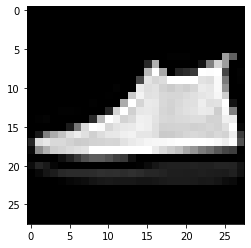

9 Ankle boot


In [6]:
img = np.array(re_train.iloc[10000,2:786],dtype = 'float32').reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.show()
print(re_train.iloc[10000,1],re_train.iloc[10000,786])

2 Pullover
2 Pullover
9 Ankle boot
6 Shirt
0T-shirt/top
3 Dress
4 Coat
5 Sandal


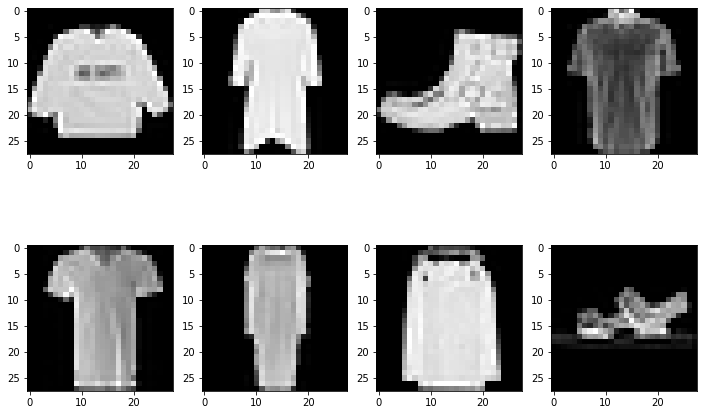

In [7]:
plt.figure(figsize=(12,8))
for i in range(8) :
    plt.subplot(2,4, i+1) # 2행4열,1~8 
    img = np.array(re_train.iloc[i*5500,2:786],dtype = 'float32').reshape((28,28))
    plt.imshow(img, cmap = 'gray')
    plt.xlabel(print(re_train.iloc[i*5500,1],re_train.iloc[i*5500,786]))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [9]:
train_data = np.array(train.iloc[:,1:], dtype='float32')
test_data = np.array(test.iloc[:,1:], dtype='float32')

In [10]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data/255

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.2, random_state=12345)

In [12]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_val = x_val.reshape(x_val.shape[0],28,28,1)

In [13]:
cnn_model = Sequential([
    Conv2D(filters=3, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    AveragePooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2, activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(rate=0.5),
    Dense(64, activation='relu'),
    Dropout(rate=0.5),
    Dense(32, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])

In [14]:
cnn_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=Adam(lr=0.001),
                  metrics=['accuracy'])

In [16]:
model_fit = cnn_model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=500,
    verbose=1,
    validation_data=(x_val,y_val),
)

48000 [==============================] - 16s 329us/sample - loss: 0.2324 - accuracy: 0.9220 - val_loss: 0.5326 - val_accuracy: 0.8857
Epoch 372/500
48000/48000 [==============================] - 14s 298us/sample - loss: 0.2163 - accuracy: 0.9248 - val_loss: 0.4982 - val_accuracy: 0.8886
Epoch 373/500
48000/48000 [==============================] - 15s 311us/sample - loss: 0.2206 - accuracy: 0.9237 - val_loss: 0.5195 - val_accuracy: 0.8867
Epoch 374/500
48000/48000 [==============================] - 15s 319us/sample - loss: 0.2226 - accuracy: 0.9233 - val_loss: 0.5059 - val_accuracy: 0.8882
Epoch 375/500
48000/48000 [==============================] - 16s 329us/sample - loss: 0.2186 - accuracy: 0.9258 - val_loss: 0.5250 - val_accuracy: 0.8886
Epoch 376/500
48000/48000 [==============================] - 15s 319us/sample - loss: 0.2257 - accuracy: 0.9245 - val_loss: 0.5157 - val_accuracy: 0.8882
Epoch 377/500
48000/48000 [==============================] - 16s 343us/sample - loss: 0.2207 - a

In [17]:
print(model_fit.history.keys())

loss = model_fit.history['loss'] # train
acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss'] # validation
val_acc = model_fit.history['val_accuracy']

epochs = range(1, len(acc) + 1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


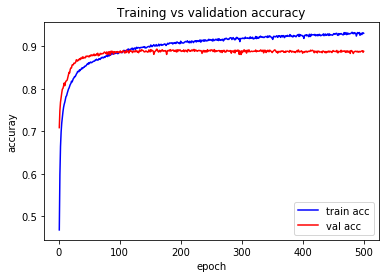

In [18]:
plt.plot(epochs, acc, 'b', label='train acc')
plt.plot(epochs, val_acc, 'r', label='val acc')
plt.title('Training vs validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuray')
plt.legend(loc='best')
plt.show()

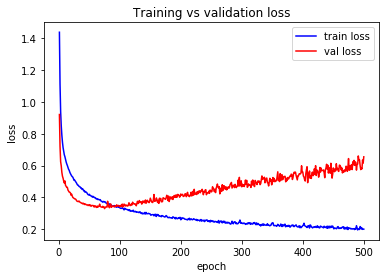

In [19]:
plt.plot(epochs, loss, 'b', label='train loss')
plt.plot(epochs, val_loss, 'r', label='val loss')
plt.title('Training vs validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [20]:
y_pred = cnn_model.predict_classes(x_test)
print(y_pred)

[0 1 2 ... 8 8 1]


In [22]:
submission['label'] = y_pred
submission.to_csv('./data/fashion_submission.csv', index = False)